In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Загрузка данных
data =pd.read_csv('../Dm_1/V8.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,cost_price,profit_markup,depth_of_tree,sales_commission,profit
0,0,1,3500.0,2,21,1000,-16500
1,1,2,3500.0,2,26,1000,-21500
2,2,3,NaN,2,23,1000,-18500
3,3,4,NaN,3,12,1000,-4000
4,4,5,3500.0,2,12,1000,-7500


In [3]:
# Формирование нового набора данных из ЛР-1
data1 = pd.DataFrame(data)
data1.drop(['Unnamed: 0.1','Unnamed: 0','cost_price','sales_commission',],axis=1,inplace=True)
data1.insert(0,'Cost_prise',np.random.randint(1500,5000,data.shape[0]))
data1

,Cost_prise,profit_markup,depth_of_tree,profit
0,3632,2,21,-16500
1,4405,2,26,-21500
2,3336,2,23,-18500
3,3626,3,12,-4000
4,3340,2,12,-7500
...,...,...,...,...
495,3851,5,12,3000
496,2499,3,8,0
497,4147,2,10,-5500
498,4778,4,21,-9500


In [4]:
#Заполнить путстые ячейки
median = data['cost_price'].median()
data['cost_price'].fillna(median,inplace=True)

In [5]:
# Выделение обучающей и тестовой выборок, исходные данные
data_x = data.iloc[:,:8]
data_y = data['profit']

test_size = 0.2

seed = 42
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=test_size, random_state=seed)

In [6]:
scaler = Normalizer().fit(data)
norm_data = pd.DataFrame(scaler.fit_transform(data))
norm_data

,0,1,2,3,4,5,6
0,0.000000,0.000059,0.207140,0.000118,0.001243,0.059183,-0.976519
1,0.000046,0.000092,0.160506,0.000092,0.001192,0.045859,-0.985968
2,0.000106,0.000159,0.185630,0.000106,0.001220,0.053037,-0.981187
3,0.000555,0.000740,0.647148,0.000555,0.002219,0.184900,-0.739598
4,0.000480,0.000600,0.419832,0.000240,0.001439,0.119952,-0.899639
...,...,...,...,...,...,...,...
495,0.103800,0.104010,0.733941,0.001048,0.002516,0.209697,0.629092
496,0.133795,0.134065,0.944117,0.000809,0.002158,0.269748,0.000000
497,0.074930,0.075080,0.527674,0.000302,0.001508,0.150764,-0.829202
498,0.048834,0.048932,0.343207,0.000392,0.002059,0.098059,-0.931563


In [7]:
# Выделение обучающей и тестовой выборок, исходные нормализованные данные

data_x = norm_data.iloc[:,:8]
data_y = norm_data[6]

test_size = 0.2

seed = 42
data_x_train_n, data_x_test_n, data_y_train_n, data_y_test_n = train_test_split(data_x, data_y, test_size=test_size, random_state=seed)

In [8]:
# Выделение обучающей и тестовой выборок, новые данные
data_x = data1.iloc[:,:5]
data_y = data1['profit']

test_size = 0.2

seed = 5
data_x_train_new, data_x_test_new, data_y_train_new, data_y_test_new = train_test_split(data_x, data_y, test_size=test_size, random_state=seed)

In [9]:
scaler = Normalizer().fit(data1)
norm_data1 = pd.DataFrame(scaler.fit_transform(data1))
norm_data1

,0,1,2,3
0,0.214975,0.000118,0.001243,-0.976619
1,0.200714,0.000091,0.001185,-0.979649
2,0.177462,0.000106,0.001224,-0.984127
3,0.671619,0.000556,0.002223,-0.740893
4,0.406816,0.000244,0.001462,-0.913509
...,...,...,...,...
495,0.788875,0.001024,0.002458,0.614548
496,0.999994,0.001200,0.003201,0.000000
497,0.602041,0.000290,0.001452,-0.798463
498,0.449318,0.000376,0.001975,-0.893370


In [10]:
# Выделение обучающей и тестовой выборок, новые нормализованные данные
data_x = norm_data1.iloc[:,:5]
data_y = norm_data1[3]

test_size = 0.2

seed = 5
data_x_train_new_n, data_x_test_new_n, data_y_train_new_n, data_y_test_new_n = train_test_split(data_x, data_y, test_size=test_size, random_state=seed)

In [11]:
#CART
results_rmse=[]
results_r2=[]
name =['Orig','Orig_norm','New','New_norm']
x_d = [data_x_train, data_x_train_n, data_x_train_new, data_x_train_new_n ]
y_d = [data_y_train, data_y_train_n, data_y_train_new, data_y_train_new_n]
for i in range(len(x_d)):
    model = DecisionTreeRegressor(max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state=42)
    model.fit(x_d[i],y_d[i])
    data_y_pred = model.predict(x_d[i])
    rmse=np.sqrt(mean_squared_error(y_d[i],data_y_pred))
    r2=r2_score(y_d[i],data_y_pred)
    results_rmse.append(rmse)
    results_r2.append(r2)
for i in range(len(x_d)):
    print(name[i],"\tRMSE =", results_rmse[i], "\tR2 =", results_r2[i])
    

Orig 	RMSE = 2720.4312748532175 	R2 = 0.9156536798440819
Orig_norm 	RMSE = 0.10595318731076178 	R2 = 0.9790522130670857
New 	RMSE = 2641.8757183252596 	R2 = 0.914108936156833
New_norm 	RMSE = 0.10764866471295353 	R2 = 0.9787409376838606


# RMSE среди исходных данных лучше у New, среди нормированных лучше у Orig_norm, R2 среди исходных лучше у Orig, а среди нормированных лучше у Orig_norm. Поэтому для Greed Search выберу Orig_norm (Исходные нормированные данные)

max_depth =14
min_samples_split =2
min_samples_leaf =1
rmse =0.0
r2 =1.0


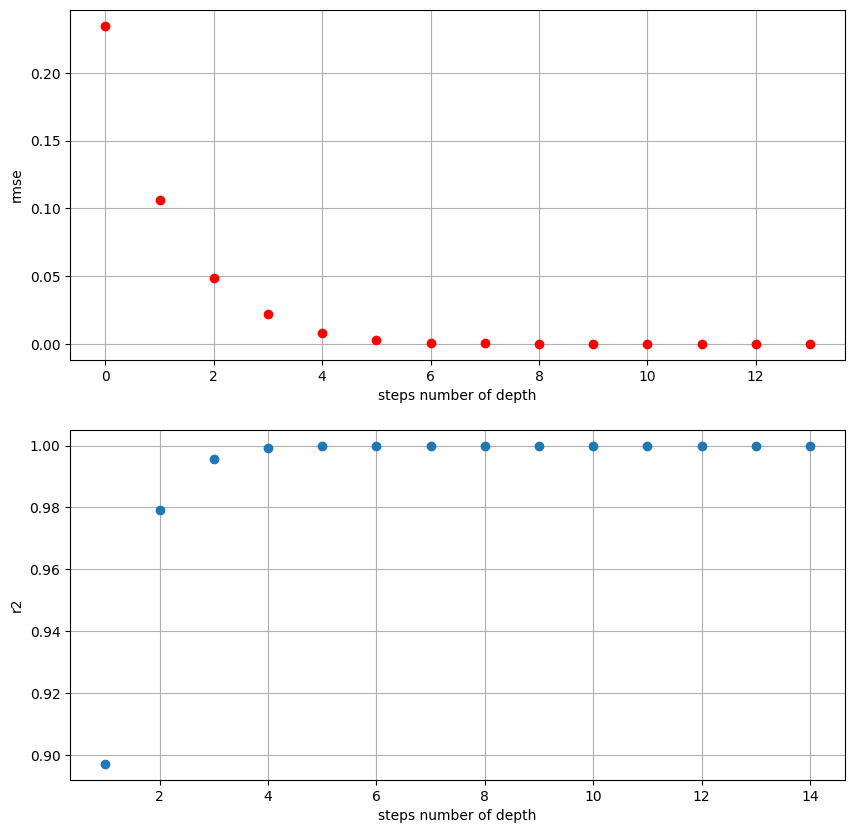

In [12]:
#CART train
# Greed Search 
results_rmse=[]
results_r2=[]
max_depth=np.arange(1,15,1)# def none 
min_samples_split = np.arange(2,3,1)# def 2 ##The minimum number of samples required to split
min_samples_leaf = np.arange(1,2,1) # def 1 ##The minimum number of samples required to be at a leaf node
tmp_m, tmp_s, tmp_l, tmp_rmse, tmp_r2 = 10,10,10,10,10
tmp_model_cart, tmp_y_pred = 0,0

for m in max_depth:
    for s in min_samples_split:
        for l in min_samples_leaf:
            model = DecisionTreeRegressor(max_depth=m, min_samples_split=s, min_samples_leaf=l, random_state=42)
            model.fit(data_x_train_n,data_y_train_n)
            data_y_pred = model.predict(data_x_train_n)
            rmse=np.sqrt(mean_squared_error(data_y_train_n,data_y_pred))
            r2=r2_score(data_y_train_n,data_y_pred)
            results_rmse.append(rmse)
            results_r2.append(r2)
            if rmse<tmp_rmse:
                tmp_m, tmp_s, tmp_l, tmp_rmse, tmp_r2 = m,s,l,rmse,r2
                tmp_model_cart,tmp_y_pred = model,data_y_pred
print(f'max_depth ={tmp_m}\nmin_samples_split ={tmp_s}\nmin_samples_leaf ={tmp_l}\nrmse ={tmp_rmse}\nr2 ={tmp_r2}')

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(results_rmse,'o',color='red')
plt.ylabel('rmse')
plt.xlabel('steps number of depth')
plt.grid()
plt.subplot(212)
plt.plot(max_depth, results_r2,'o')
plt.ylabel('r2')
plt.xlabel('steps number of depth')
plt.grid()
plt.show()

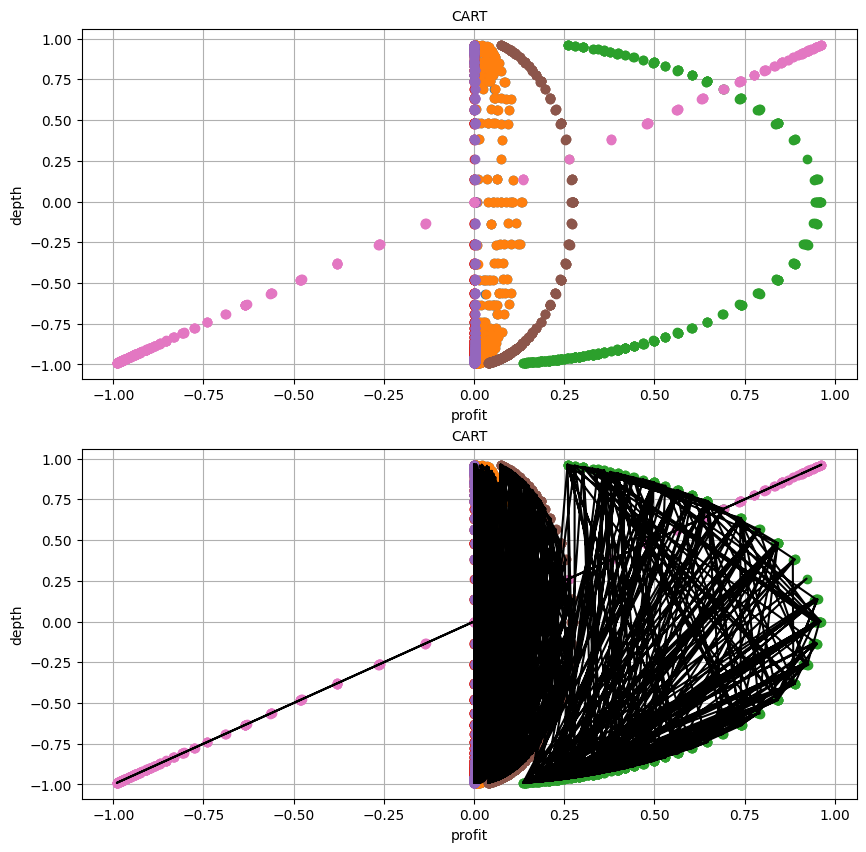

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(data_x_train_n,data_y_train_n,'o')
plt.grid()
plt.title("CART",fontsize=10)
plt.ylabel("depth")
plt.xlabel("profit")
plt.subplot(212)
plt.plot(data_x_train_n,data_y_train_n,'o')
plt.plot(data_x_train_n,tmp_y_pred,'black')
plt.grid()
plt.title("CART",fontsize=10)
plt.ylabel("depth")
plt.xlabel("profit")
plt.show()

In [ ]:
plt.figure(figsize=(30, 30)) # Resize figure
plot_tree(tmp_model_cart, filled=True)
plt.show()

In [ ]:
#AdaBoost train
# Greed Search 
results_rmse=[]
results_r2=[]
max_depth=np.arange(1,15,1)# def none 
tmp_m, tmp_rmse, tmp_r2 = 10,10,10,
tmp_model_ada, tmp_y_pred = 0,0
for m in max_depth:
    model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=m,random_state=42), n_estimators=200, learning_rate=0.5,random_state=42)
    model.fit(data_x_train_n,data_y_train_n)
    data_y_pred = model.predict(data_x_train_n)
    rmse=np.sqrt(mean_squared_error(data_y_train_n,data_y_pred))
    r2=r2_score(data_y_train_n,data_y_pred)
    results_rmse.append(rmse)
    results_r2.append(r2)
    if rmse<tmp_rmse:
        tmp_m, tmp_rmse, tmp_r2 = m,rmse,r2
        tmp_model_ada,tmp_y_pred = model,data_y_pred
print(f'max_depth ={tmp_m}\nrmse ={tmp_rmse}\nr2 ={tmp_r2}')
plt.plot(results_rmse,'o',color='red')
plt.plot(max_depth, results_r2,'o')
plt.grid()
plt.show()

In [ ]:
#Cart test
data_y_pred = tmp_model_cart.predict(data_x_test_n)
rmse=np.sqrt(mean_squared_error(data_y_test_n,data_y_pred))
r2=r2_score(data_y_test_n,data_y_pred)
print(f'rmse ={rmse}\nr2 ={r2}')

In [ ]:
#AdaBoost test
data_y_pred = tmp_model_ada.predict(data_x_test_n)
rmse=np.sqrt(mean_squared_error(data_y_test_n,data_y_pred))
r2=r2_score(data_y_test_n,data_y_pred)
print(f'rmse ={rmse}\nr2 ={r2}')

# В Лр-1 были получены следующие результаты для модели ElasticNet на тестовой выборке
# RMSE = 0.00010785630541604185
# R2 = 0.9999999999999999
# Делаем вывод, что модель ElasticNet дает результат лучше, чем модель Cart в неансамблевом виде и в ансамблевом